In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
#Obtendo os dados
file_data = "20191015.csv"
file_ambiente = "ambientais-ufms"
file_inversor = "inversor_1_ufms"
dados_ambiente = pd.read_csv("Data/ufms/"+file_ambiente+"-"+file_data)
dados_inversor = pd.read_csv("Data/ufms/"+file_inversor+"-"+file_data)


In [3]:
print(dados_ambiente)


      dia_mes_ano  hora_minuto   irr  massaPM1  massaPM2  massaPM4  massaPM10  \
0        20191015          100  0.00      4.77      0.16         0          0   
1        20191015          200  0.00      4.67      0.16         0          0   
2        20191015          300  6.54      5.00      0.17         0          0   
3        20191015          500  0.60      5.52      0.18         0          0   
4        20191015          600  0.00      6.22      0.21         0          0   
...           ...          ...   ...       ...       ...       ...        ...   
1368     20191015       235500  2.58      1.41      0.05         0          0   
1369     20191015       235600  0.00      1.16      0.04         0          0   
1370     20191015       235700  0.00      1.42      0.05         0          0   
1371     20191015       235800  0.00      1.51      0.05         0          0   
1372     20191015       235900  0.00      1.42      0.05         0          0   

      numPM1  numPM2  numPM

In [4]:
print(dados_inversor)

      dia_mes_ano  hora_minuto  P_AC  I_AC  I_DC   V_AC   V_DC  IRR
0        20191015        51700     9  0.09  0.09  217.8  422.7    6
1        20191015        51800    17  0.12  0.10  217.8  458.8    6
2        20191015        51900    27  0.16  0.12  217.9  472.9    7
3        20191015        52000    39  0.21  0.14  218.0  488.9    9
4        20191015        52100    51  0.26  0.17  217.8  489.1    9
...           ...          ...   ...   ...   ...    ...    ...  ...
1040     20191015       235500     0  0.09  0.00  216.3   46.1    0
1041     20191015       235600     0  0.09  0.00  216.3   46.0    0
1042     20191015       235700     0  0.09  0.00  216.3   46.0    0
1043     20191015       235800     0  0.09  0.00  216.3   46.2    0
1044     20191015       235900     0  0.09  0.00  216.3   46.2    0

[1045 rows x 8 columns]


In [5]:
#Obtendo hora_mintuo da primeira e da última medida do inversor
primeira_hm_inversor = dados_inversor.hora_minuto[0]
print(primeira_hm_inversor)
ultima_hm_inversor = dados_inversor.hora_minuto[dados_inversor.shape[0]-1]
print(ultima_hm_inversor)

51700
235900


In [6]:
'''
Como podemos perceber, o tamanho dos dados de ambiente e do inversor são diferentes, nem sempre começam e terminam na mesma hora_minuto
Sendo assim temos que filtrar a medida de ambiente para conter as mesmas medidas do inversor
'''
#Obtendo hora_mintuo da primeira e da última medida do ambiente
primeira_hm_ambiente = dados_ambiente.hora_minuto[0]
print(primeira_hm_ambiente)
ultima_hm_ambiente = dados_ambiente.hora_minuto[dados_ambiente.shape[0]-1]
print(ultima_hm_ambiente)


100
235900


In [7]:
selecao = dados_ambiente["hora_minuto"] >= primeira_hm_inversor
dados2 = dados_ambiente[selecao].reset_index()
print(dados2.shape[0])
print(dados_inversor.shape[0])



1061
1045


In [8]:
i_list = []
count = 0
last_hora_minuto = 52000
for i in dados_inversor.index:
    if(dados_inversor["hora_minuto"][i] - last_hora_minuto != 100):
        if(dados_inversor["hora_minuto"][i] - last_hora_minuto != 4100):
            count += 1
            i_list.append(i)
    last_hora_minuto = dados_inversor["hora_minuto"][i]
print(count)
print(i_list)

26
[0, 198, 203, 209, 224, 236, 291, 293, 295, 300, 302, 305, 327, 365, 384, 386, 407, 409, 410, 412, 552, 562, 567, 570, 614, 617]


In [9]:
i_list = []
count = 0
last_hora_minuto = 52000
for i in dados2.index:
    if(dados2["hora_minuto"][i] - last_hora_minuto != 100):
        if(dados2["hora_minuto"][i] - last_hora_minuto != 4100):
            count += 1
            i_list.append(i)
    last_hora_minuto = dados2["hora_minuto"][i]
print(count)
print(i_list)

14
[0, 198, 226, 238, 332, 335, 400, 445, 568, 579, 587, 622, 634, 887]


In [10]:
'''
Percebemos que a base de dados do ambiente não contém duas medidas no dia inteiro
Então caso queiramos comparar com essa base de dado com a do inversor iremos necessitar de realizar uma verificação
Para conseguir sincronizar as duas base de dados e os seus valores
'''
print(dados2["hora_minuto"][541:550])

541    151100
542    151200
543    151300
544    151400
545    151500
546    151600
547    151700
548    151800
549    151900
Name: hora_minuto, dtype: int64


In [11]:
#Verificando se os IRR das duas tabelas coincidem
#52300  = 0.6
print(dados_inversor[dados_inversor["hora_minuto"] == 72300])
print(dados_ambiente[dados_ambiente["hora_minuto"] == 72300])

     dia_mes_ano  hora_minuto  P_AC  I_AC  I_DC   V_AC   V_DC  IRR
126     20191015        72300  1548  7.17  2.83  216.0  559.3  162
     dia_mes_ano  hora_minuto     irr  massaPM1  massaPM2  massaPM4  \
438     20191015        72300  167.18      6.69      0.22         0   

     massaPM10  numPM1  numPM2  numPM4  numPM10  tamanho_medio   temp  \
438          0   55.19    0.15       0        0           0.45  24.81   

     vento_dir  vento_vel  rainfall  
438        225      10.64       0.0  


### Começando a trabalhar na visualização dos dados

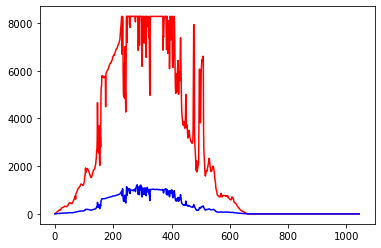

In [12]:

plt.plot(dados_inversor['P_AC'],color = "red") # printando a potência AC gerada
plt.plot(dados_inversor['IRR'],color = "blue") # Printando irr: solar irradiation (W/m2)

In [13]:
#importando e definindo a função necessária para calcular r²
from scipy import stats
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

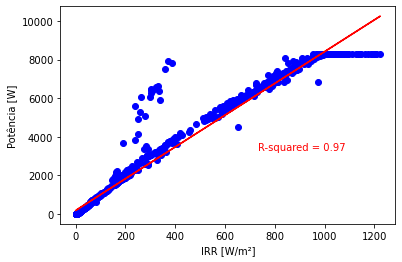

R-square =  0.9674423637672337


In [14]:
plt.scatter(dados_inversor['IRR'],dados_inversor['P_AC'], color = "blue")
plt.xlabel("IRR [W/m²]")
plt.ylabel("Potência [W]")

a, b = np.polyfit(dados_inversor['IRR'],dados_inversor['P_AC'], 1) #Encontrando a melhor fit line (R²) entre os dois valores
plt.plot(dados_inversor["IRR"], a*dados_inversor["IRR"]+b, color = "red",)
r2 = rsquared(dados_inversor['IRR'],dados_inversor['P_AC'])
plt.text(0.6*dados_inversor['IRR'].max(), 0.4*dados_inversor['P_AC'].max(), 'R-squared = %0.2f' % r2, color = "red")
plt.show()

print("R-square = ", r2)